<a href="https://colab.research.google.com/github/NelluriLokesh/Baltimore-Salary-prediction-using-SVM-SVR-/blob/main/Linear_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the House sqft using Linear Regression

# Problem Statement :
    In this project we are predicting the sqft of the building according to the price of the building....

Models :
1. Linear Regression
2. Decision Tree Regression
3. Random Forest
4. Support Vector

# 1. Linear Regression

# Steps :
1. Importing the Libraries
2. Importing the Dataset
3. data analysis
    1. Data Cleaning
    2. Data Exploratation
    3. Exploratory Data Analysis
    4. Data Manipulation
4. Exploratory Data Analysis
    1. matplotlib(plt) graphes - Bar, Scatter, hbar
    2. seaborn(sns) graphes - headmap, pairplot ,distplot

# Machine Learning
5. Chossing the Feature and Target
6. Splitting the data
7. chossing the data
8. training / testing the data
9. Performance/Accuracy

Importing the Libraries

In [1]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To clean the data :
import re

# Machine Learning libraries
from sklearn.model_selection import train_test_split
## for model selection
from sklearn.linear_model import LinearRegression
## to know the Performance/Accuracy
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Importing the datset

In [ ]:
data = pd.read_csv(r"C:\Users\ABC\Desktop\data scientist\Machine L Projects\US Prisons datset using all MODELS\Project file\data.csv")

In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


all columns

In [ ]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

Explaning the colunms :
1. date: The recording date of the data.
2. price: Property price in local currency.
3. bedrooms: Number of bedrooms in the property.
4. bathrooms: Number of bathrooms in the property.
5. sqft_living: Total indoor living area in square feet.
6. sqft_lot: Total land area in square feet.
7. floors: Number of floors in the property.
8. waterfront: 1 if property is waterfront, 0 if not.
9. view: Rating of property's view.
10. condition: Rating of property's condition.
11. sqft_above: Square footage above ground level.
12. sqft_basement: Square footage of the basement.
13. yr_built: Year the property was built.
14. yr_renovated: Year of the last renovation.
15. street: Street address of the property.
16. city: City where the property is located.
17. statezip: State and ZIP code of the property.
18. country: Country where the property is situated.


In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# data analysis - (DC , EDA, DE, DM,DV)

Cleaning the data

In [ ]:
## change the float values into int in the "bedrooms" , "bathrooms" and "floors" columns

data['bathrooms'] = data['bathrooms'].astype(int)
data['bedrooms'] = data['bedrooms'].astype(int)
data['floors'] = data['floors'].astype(int)

dropping Price column

In [ ]:
data['price'] = data['price'].astype(int)

In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In date column clean the data and only print year-month-day

In [ ]:
for i in range(len(data['date'])):
    data['date'][i] = re.sub("00:00:00","",str(data['date'][i]))

In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Dropping the columns "yr_renovated", "street", "city", "statezip" and "country".
the reasons are :
1. street: Drop it because specific addresses usually don't impact prices much.
2. country: If you're already in one country, you don't need this column.
3. statezip: Redundant if you're listing cities; it could create confusion.
4. yr_renovated: Skip it if recent renovations don't greatly change prices.

In [ ]:
data.drop(columns={'street','country','statezip',"yr_renovated"}, inplace=True)

In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city
0,2014-05-02,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,Shoreline
1,2014-05-02,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,Seattle
2,2014-05-02,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,Kent
3,2014-05-02,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,Bellevue
4,2014-05-02,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,Seattle
4596,2014-07-09,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,Bellevue
4597,2014-07-09,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,Renton
4598,2014-07-10,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,Seattle


Finding all the null values in the dataset

In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
city             0
dtype: int64

Creating a new column building_age according to their yr_built

building_age = current_year - yr_built

In [ ]:
# setting the current year
current_age = 2023

In [ ]:
data.insert(12,"building_age",current_age - data['yr_built'])

In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,building_age,yr_built,city
0,2014-05-02,313000,3,1,1340,7912,1,0,0,3,1340,0,68,1955,Shoreline
1,2014-05-02,2384000,5,2,3650,9050,2,0,4,5,3370,280,102,1921,Seattle
2,2014-05-02,342000,3,2,1930,11947,1,0,0,4,1930,0,57,1966,Kent
3,2014-05-02,420000,3,2,2000,8030,1,0,0,4,1000,1000,60,1963,Bellevue
4,2014-05-02,550000,4,2,1940,10500,1,0,0,4,1140,800,47,1976,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3,1,1510,6360,1,0,0,4,1510,0,69,1954,Seattle
4596,2014-07-09,534333,3,2,1460,7573,2,0,0,3,1460,0,40,1983,Bellevue
4597,2014-07-09,416904,3,2,3010,7014,2,0,0,3,3010,0,14,2009,Renton
4598,2014-07-10,203400,4,2,2090,6630,1,0,0,3,1070,1020,49,1974,Seattle


Drop the column city

In [ ]:
data.drop(columns={"city"},axis=1,inplace=True)

In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,building_age,yr_built
0,2014-05-02,313000,3,1,1340,7912,1,0,0,3,1340,0,68,1955
1,2014-05-02,2384000,5,2,3650,9050,2,0,4,5,3370,280,102,1921
2,2014-05-02,342000,3,2,1930,11947,1,0,0,4,1930,0,57,1966
3,2014-05-02,420000,3,2,2000,8030,1,0,0,4,1000,1000,60,1963
4,2014-05-02,550000,4,2,1940,10500,1,0,0,4,1140,800,47,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3,1,1510,6360,1,0,0,4,1510,0,69,1954
4596,2014-07-09,534333,3,2,1460,7573,2,0,0,3,1460,0,40,1983
4597,2014-07-09,416904,3,2,3010,7014,2,0,0,3,3010,0,14,2009
4598,2014-07-10,203400,4,2,2090,6630,1,0,0,3,1070,1020,49,1974


# Exploratory Data Analysis 🚀

Make a copy of the data

In [ ]:
data_1 = data.copy()

C:\Users\ABC\AppData\Local\Temp\ipykernel_16440\533684095.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1.price)


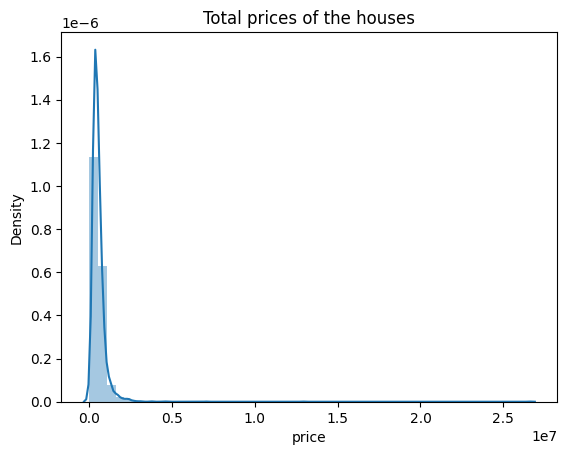

In [ ]:
# Check distribution of Target Variable
sns.distplot(data_1.price)
plt.title("Total prices of the houses")
plt.show()

Plotting the bar between "sqft_living" and "price" of the building

In [ ]:
data_1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,building_age,yr_built
0,2014-05-02,313000,3,1,1340,7912,1,0,0,3,1340,0,68,1955
1,2014-05-02,2384000,5,2,3650,9050,2,0,4,5,3370,280,102,1921
2,2014-05-02,342000,3,2,1930,11947,1,0,0,4,1930,0,57,1966
3,2014-05-02,420000,3,2,2000,8030,1,0,0,4,1000,1000,60,1963
4,2014-05-02,550000,4,2,1940,10500,1,0,0,4,1140,800,47,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3,1,1510,6360,1,0,0,4,1510,0,69,1954
4596,2014-07-09,534333,3,2,1460,7573,2,0,0,3,1460,0,40,1983
4597,2014-07-09,416904,3,2,3010,7014,2,0,0,3,3010,0,14,2009
4598,2014-07-10,203400,4,2,2090,6630,1,0,0,3,1070,1020,49,1974


Plotting a bar graph between the "price" off the building and "sqft_lot" of the building

Text(0, 0.5, 'sqft of the building')

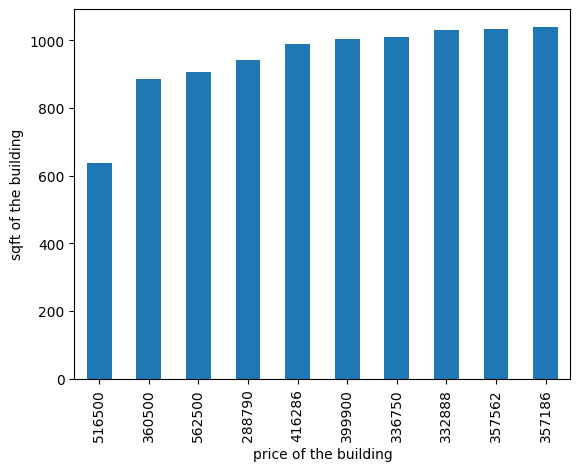

In [ ]:
data_1.groupby(['price'])['sqft_lot'].mean().sort_values().head(10).plot.bar()
plt.xlabel("price of the building")
plt.ylabel("sqft of the building")

Text(0.5, 1.0, 'sqft of the living room according to the price of the building')

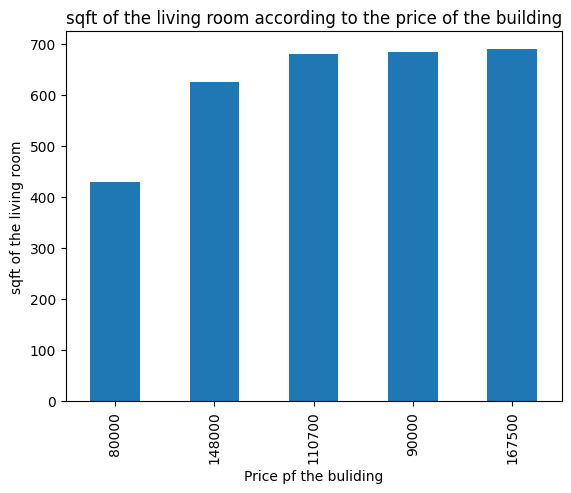

In [ ]:
data_1.groupby(['price'])['sqft_living'].mean().sort_values().head(5).plot.bar()
plt.xlabel("Price pf the buliding")
plt.ylabel("sqft of the living room")
plt.title("sqft of the living room according to the price of the building")

In [ ]:
data_1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,building_age,yr_built
0,2014-05-02,313000,3,1,1340,7912,1,0,0,3,1340,0,68,1955
1,2014-05-02,2384000,5,2,3650,9050,2,0,4,5,3370,280,102,1921
2,2014-05-02,342000,3,2,1930,11947,1,0,0,4,1930,0,57,1966
3,2014-05-02,420000,3,2,2000,8030,1,0,0,4,1000,1000,60,1963
4,2014-05-02,550000,4,2,1940,10500,1,0,0,4,1140,800,47,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3,1,1510,6360,1,0,0,4,1510,0,69,1954
4596,2014-07-09,534333,3,2,1460,7573,2,0,0,3,1460,0,40,1983
4597,2014-07-09,416904,3,2,3010,7014,2,0,0,3,3010,0,14,2009
4598,2014-07-10,203400,4,2,2090,6630,1,0,0,3,1070,1020,49,1974


Plot a bar graph using buliding price according to the bedrooms in the buliding top 4

Text(0.5, 1.0, 'No.of bedrooms equal to building price')

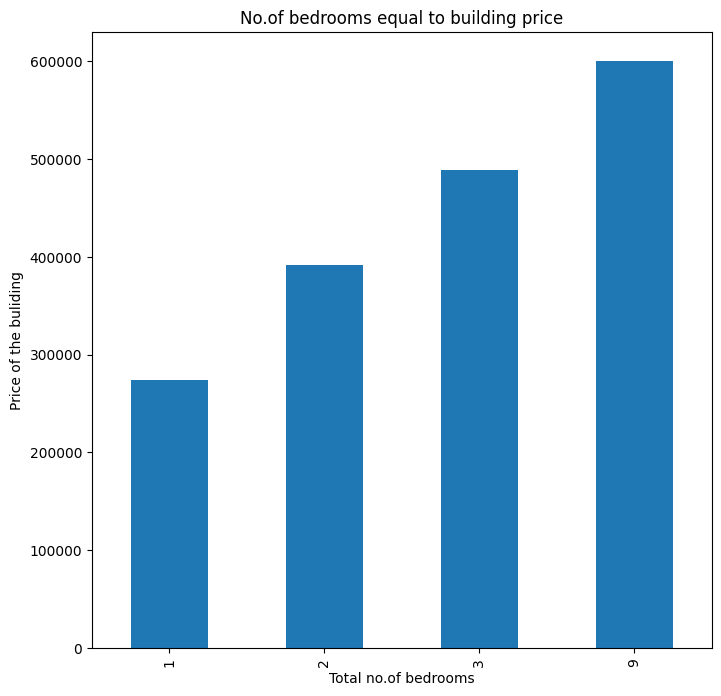

In [ ]:
plt.figure(figsize=(8,8))
data_1.groupby(['bedrooms'])['price'].mean().sort_values().head(4).plot.bar()
plt.xlabel("Total no.of bedrooms")
plt.ylabel("Price of the buliding")
plt.title("No.of bedrooms equal to building price")

Plot a pair plot

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x2000 with 0 Axes>

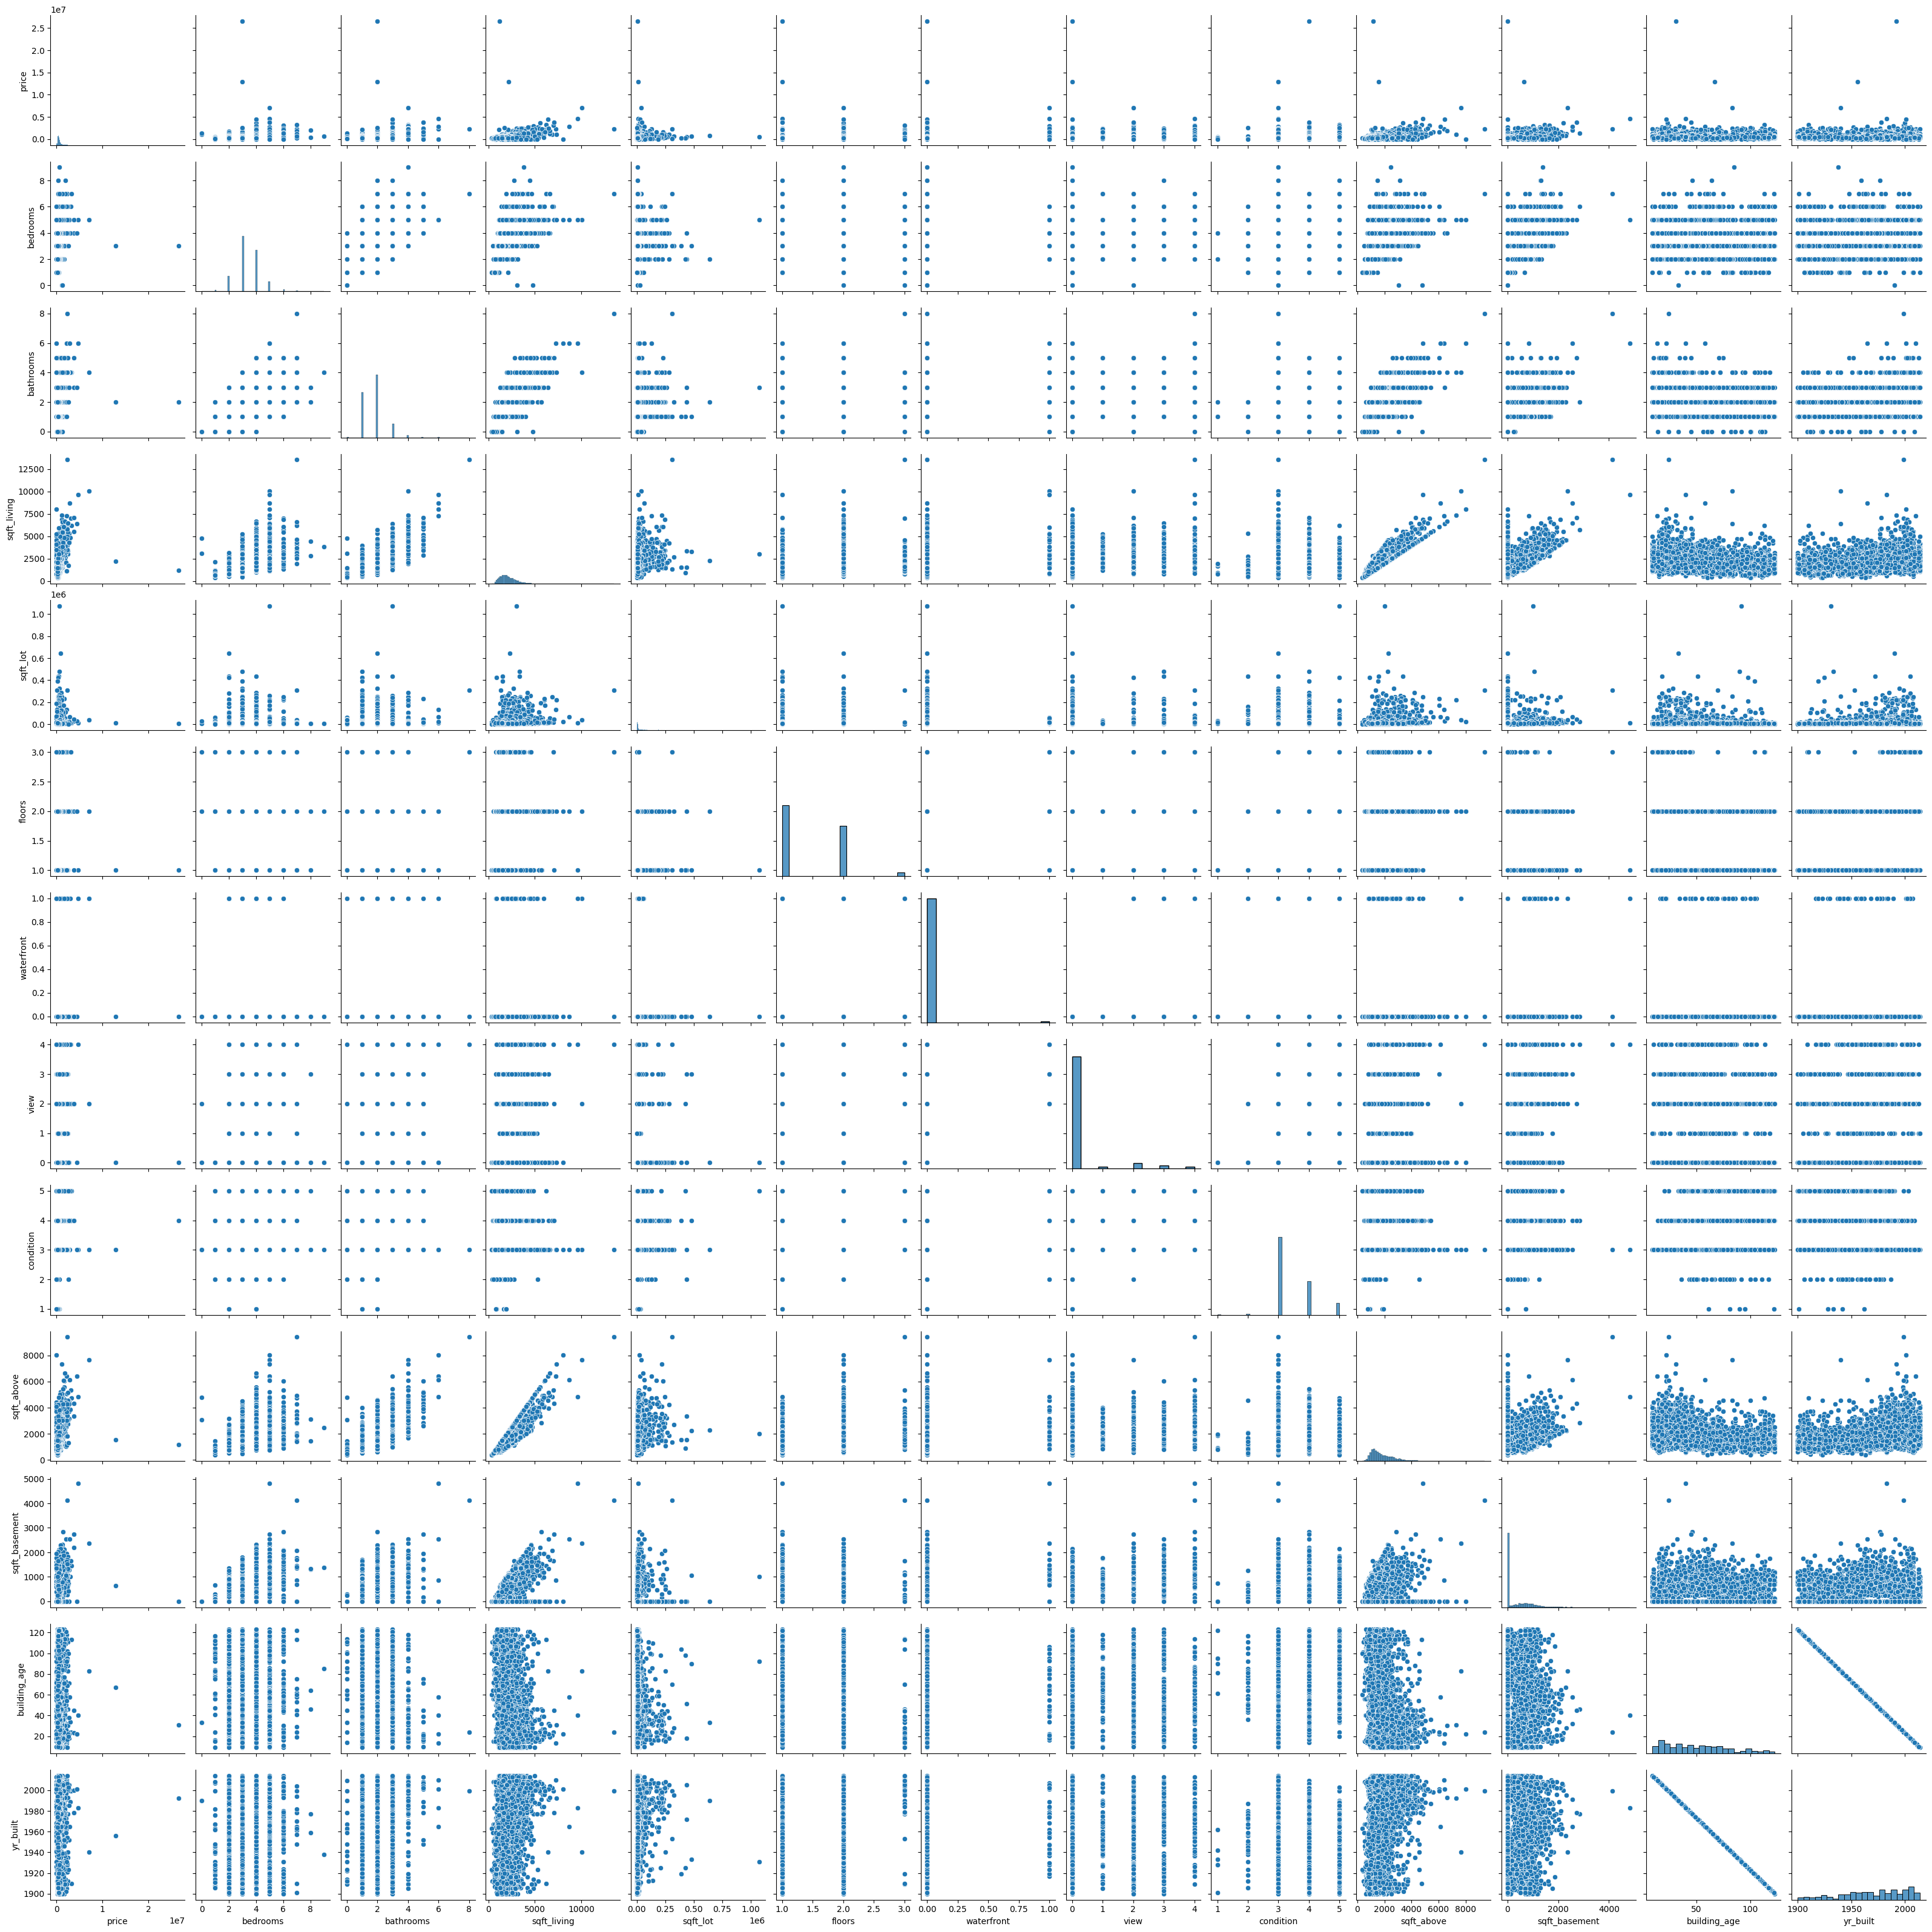

In [ ]:
plt.figure(figsize=(15,20))
sns.pairplot(data_1)
plt.show()

Nothing seems to have any [correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). Lets visualize correlation coefficients using [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Plotting a heatMap

<Axes: >

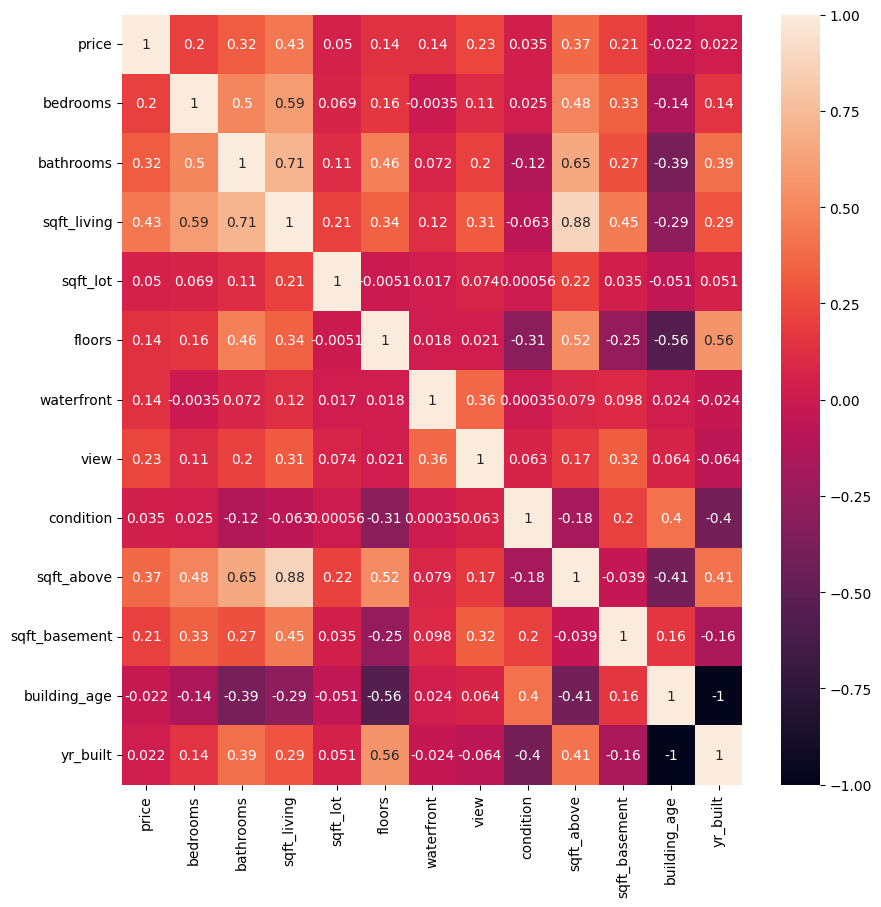

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data_1.iloc[:,1:].corr(),annot=True)

# Machine Learning🧑‍💻

Select the Feature and Targets

In [ ]:
data_1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,building_age,yr_built
0,2014-05-02,313000,3,1,1340,7912,1,0,0,3,1340,0,68,1955
1,2014-05-02,2384000,5,2,3650,9050,2,0,4,5,3370,280,102,1921
2,2014-05-02,342000,3,2,1930,11947,1,0,0,4,1930,0,57,1966
3,2014-05-02,420000,3,2,2000,8030,1,0,0,4,1000,1000,60,1963
4,2014-05-02,550000,4,2,1940,10500,1,0,0,4,1140,800,47,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3,1,1510,6360,1,0,0,4,1510,0,69,1954
4596,2014-07-09,534333,3,2,1460,7573,2,0,0,3,1460,0,40,1983
4597,2014-07-09,416904,3,2,3010,7014,2,0,0,3,3010,0,14,2009
4598,2014-07-10,203400,4,2,2090,6630,1,0,0,3,1070,1020,49,1974


In [ ]:
X = np.array(data_1.iloc[:,1])
Y = np.array(data_1.iloc[:,5])

In [ ]:
X

array([ 313000, 2384000,  342000, ...,  416904,  203400,  220600])

In [ ]:
Y

array([ 7912,  9050, 11947, ...,  7014,  6630,  8102], dtype=int64)

# splitting the data into 2 sets (train and test)

Import libraries : from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.5)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(2300, 2300, 2300, 2300)

# Chossing the model

import libraries : from sklearn.linear_model import LinearRegression

In [ ]:
## chosse the model
lrModel = LinearRegression()

In [ ]:
## Reshaping the data
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

# Fitting the model/ Training the model

In [ ]:
lrModel.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lrModel.predict(x_test)

In [ ]:
len(y_train),len(y_pred)

(2300, 2300)

In [ ]:
df = pd.DataFrame({"Actual":y_test.reshape(-1),"Predicted":y_pred.reshape(-1)})

In [ ]:
df

,Actual,Predicted
0,5593,14692.638868
1,11443,14404.136544
2,4038,14127.174312
3,4200,14120.247948
4,103672,14081.013940
...,...,...
2295,5752,14381.056358
2296,13084,15142.702495
2297,9640,14311.815800
2298,5353,14300.044905


# Performance/Accuracy

In [ ]:
r2_score(y_test,y_pred)

0.002384480739295314

In [ ]:
mean_squared_error(y_train,y_pred)

1125616536.5059125

In [ ]:
mean_squared_error(y_train,y_pred)

1125616536.5059125

# conclusion

From this project the accuracy is very low.As you see the accuracy Is only 0.0023%.